<h1 style="text-align:center;">Statistical Analysis Chicago West Nile Virus Part 1: <br>Cleaning and EDA</h1>



# Problem statement

West Nile Virus (WNV) is a viral illness largely spread by mosquitoes. The disease is transmitted to a person when an infected mosquito bites them.

The city of Chicago, Illinois has been keeping track of mosquito populations and WNV prevalence using a series of traps that they place around the city. They are then able to study the captured specimens and monitor the state of WNV spread in the city.

The given mosquito tracking data from 2008 to 2019 is available here: https://www.kaggle.com/datasets/chicago/chicago-west-nile-virus-mosquito-test-results?select=west-nile-virus-wnv-mosquito-test-results.csv.

In this notebook, I will perform basic EDA and data wrangling to get familiar with the dataset from the city of Chicago.

# Part 1 - Basic Data Wrangling


In [76]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [77]:
# Read in the data
df = pd.read_csv("data/mosquito_data.csv")

In [78]:
# Check the data
df.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [79]:
# Getting the shape of the dataframe
print("Shape of dataframe:", df.shape)

Shape of dataframe: (18495, 13)


In [80]:
# Check the type of data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


As can be seen the the type of "Date" column is "object" and needs to be in "datetime" format. 

In [81]:
# Converting the "Date" column to "datetime"
df['Date'] = pd.to_datetime(df['Date'])

In [82]:
# Rechecking the types of data columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Block            18495 non-null  int64         
 4   Trap             18495 non-null  object        
 5   Trap type        18495 non-null  object        
 6   Date             18495 non-null  datetime64[ns]
 7   Mosquito number  18495 non-null  int64         
 8   Mosquito ID      18495 non-null  object        
 9   WNV Present      18495 non-null  object        
 10  Species          18495 non-null  object        
 11  Lat              15571 non-null  float64       
 12  Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.8+ MB


In [83]:
# Check the data
df.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [84]:
# Numeric columns:
numeric_df = df[['Mosquito number','Week']].copy()

# Check the data
numeric_df.head()

,Mosquito number,Week
0,2,39
1,1,39
2,2,39
3,1,39
4,9,39


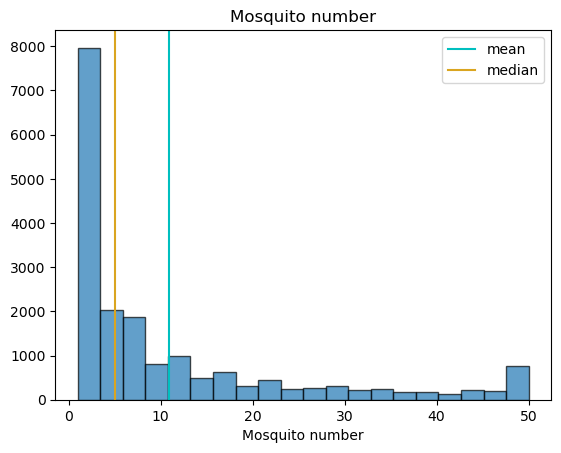

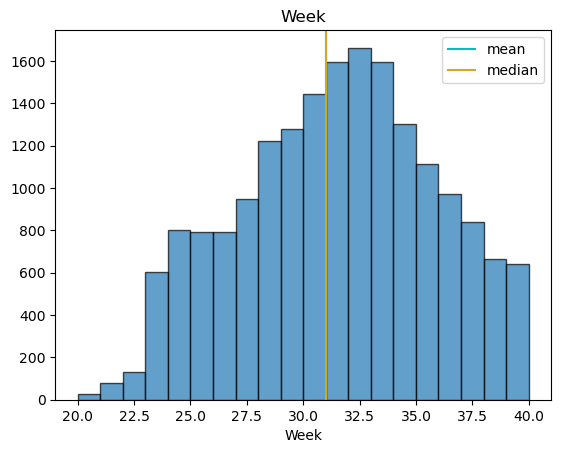

In [85]:
# Plotting distributuions of numerical data
for column in numeric_df:
    plt.hist(numeric_df[column], bins=20, edgecolor='k', alpha=0.7)
    plt.axvline(numeric_df[column].mean(), label='mean', color='c')
    plt.axvline(numeric_df[column].median(), label='median', color='goldenrod')
    plt.xlabel(column)
    plt.title(column)
    plt.legend()
    plt.show()

**Msoquito numbers**: The distribution of data shows it is skewed to the right with a long tail on the right. This means that the median of the data can describe the Msoquito numbers better than the mean. Most of the records have the value less than 10 in number of mosquitoes.

**Week**: It seems that the Week column is normally distributed and the mean and median are approximately equal (~31). Also, it is evident that the first 20 weeks (around 5 months) and the the last 12 weeks (around 3 months) are missing and the data is available from week 20 to week 40.  

In [86]:
# Categorical columns:
categorical_df = df[['Trap type','Species']].copy()

# Check the data
categorical_df.head()

,Trap type,Species
0,GRAVID,CULEX RESTUANS
1,GRAVID,CULEX RESTUANS
2,GRAVID,CULEX RESTUANS
3,GRAVID,CULEX RESTUANS
4,GRAVID,CULEX RESTUANS


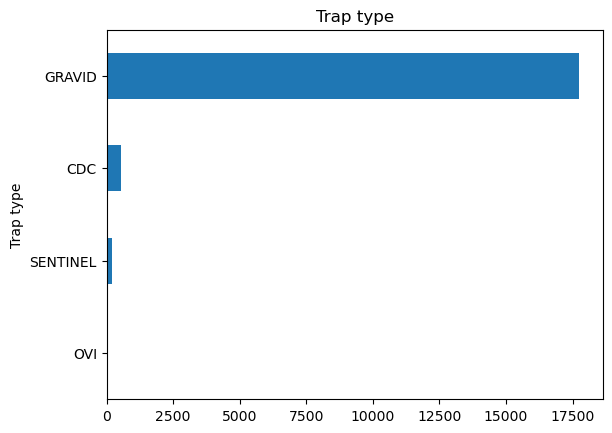

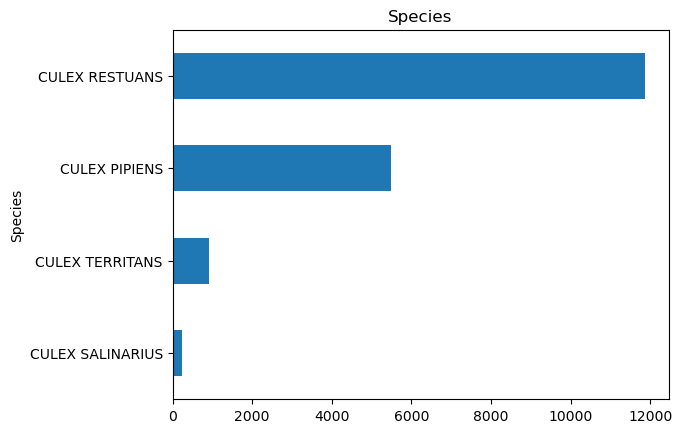

In [87]:
# Plotting distributuions of categorical data
for column in categorical_df:
    categorical_df[column].value_counts().sort_values().plot(kind='barh')
    plt.ylabel(column)
    plt.title(column)
    plt.show()

**Trap type**: There are 4 types of traps used as: 'GRAVID', 'SENTINEL', 'CDC', 'OVI'. 'GRAVID' is by far the most frequent trap used. 

**Species**: Based on the given data, 4 species have been identified, namely: 'CULEX RESTUANS', 'CULEX TERRITANS', 'CULEX SALINARIUS', and 'CULEX PIPIENS'. Among these species, 'CULEX RESTUANS' and 'CULEX PIPIENS' are the most frequently identified, while 'CULEX SALINARIUS' is the rarest.

In [88]:
# The number of duplicated rows
duplicated = df.duplicated().sum()
print("Number of duplicated rows: ", duplicated)

Number of duplicated rows:  658


In [89]:
# The number of duplicated columns
df.T.duplicated()

Year               False
Week               False
Address Block      False
Block              False
Trap               False
Trap type          False
Date               False
Mosquito number    False
Mosquito ID        False
WNV Present        False
Species            False
Lat                False
Lon                False
dtype: bool

There are 658 duplicated rows and no duplicated columns. The duplicated rows will be dropped.

In [90]:
# Drop duplicates 
df.drop_duplicates(inplace=True)
print("Number of duplicated rows dropped: ", duplicated)

Number of duplicated rows dropped:  658


In [91]:
# Check again 
df.duplicated().sum()

0

In [92]:
# Number of null values in each column
df.isna().sum()

Year                  0
Week                  0
Address Block         0
Block                 0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
Mosquito ID           0
WNV Present           0
Species               0
Lat                2266
Lon                2266
dtype: int64

In [93]:
# Percentage of null values in each column
df.isna().sum() / df.shape[0] * 100

Year                0.00000
Week                0.00000
Address Block       0.00000
Block               0.00000
Trap                0.00000
Trap type           0.00000
Date                0.00000
Mosquito number     0.00000
Mosquito ID         0.00000
WNV Present         0.00000
Species             0.00000
Lat                12.70393
Lon                12.70393
dtype: float64

### Note:
Given that ~12.7% of the values in the 'Lat' and 'Lon' columns are null, I have chosen not to drop the rows with null values. While there are some more sophisticated ways to handle missing lat and long information such as geocoding APIs (e.g., geopy.geocoders), the missing lat and long values will be found manually using google maps. This is because only there are ten unique addresses with missing lat and long information.

In [94]:
# Finding rows with NaN values in Lat and Lon
missing_lat_lon = df[df[['Lat', 'Lon']].isnull().any(axis=1)]

# Displaying the rows with missing Lat and Lon
missing_lat_lon_addresses = missing_lat_lon[['Address Block', 'Lat', 'Lon']]
missing_lat_lon_addresses

,Address Block,Lat,Lon
0,100XX W OHARE AIRPORT,NaN,NaN
44,100XX W OHARE AIRPORT,NaN,NaN
55,100XX W OHARE AIRPORT,NaN,NaN
57,100XX W OHARE AIRPORT,NaN,NaN
93,100XX W OHARE AIRPORT,NaN,NaN
...,...,...,...
15430,4XX W 127TH,NaN,NaN
15439,4XX W 127TH,NaN,NaN
15441,43XX N ASHLAND,NaN,NaN
15452,65XX N OAK PARK AVE,NaN,NaN


In [95]:
# Find the unique addresses
unique_addresses = missing_lat_lon_addresses['Address Block'].unique()
print("Number of unique addresses: ", len(unique_addresses))
unique_addresses


Number of unique addresses:  10


array(['100XX W OHARE AIRPORT', '4XX W 127TH', '100XX W OHARE',
       '81XX S ASHLAND', '79XX S CHICAGO', '98XX S AVENUE G',
       '65XX N OAK PARK AVE', '115XX S AVENUE L', '30XX S HOYNE',
       '43XX N ASHLAND'], dtype=object)

In [96]:
# Count the number of unique addresses
unique_addresses_counts = missing_lat_lon_addresses['Address Block'].value_counts()
unique_addresses_counts

Address Block
100XX W OHARE AIRPORT    1499
4XX W 127TH               264
100XX W OHARE             178
79XX S CHICAGO            127
81XX S ASHLAND            116
115XX S AVENUE L           32
65XX N OAK PARK AVE        17
30XX S HOYNE               12
98XX S AVENUE G            11
43XX N ASHLAND             10
Name: count, dtype: int64

In [97]:
# Creating a dictionary for the Lat and Lon values for the missing addresses from google maps
missing_addresses_coords = {
    '100XX W OHARE AIRPORT': (41.974162, -87.907321),
    '4XX W 127TH': (41.663885, -87.632902),
    '100XX W OHARE': (41.974162, -87.907321),
    '81XX S ASHLAND': (41.745381, -87.663937),
    '79XX S CHICAGO': (41.751724, -87.585137),
    '98XX S AVENUE G': (41.717374, -87.537209),
    '65XX N OAK PARK AVE': (42.001043, -87.799615),
    '115XX S AVENUE L': (41.685072, -87.533342),
    '30XX S HOYNE': (41.837875, -87.677315),
    '43XX N ASHLAND': (41.961525, -87.668403)
}

In [98]:
# Function to fill missing latitude and longitude
def fill_missing_lat_lon(row):
    if pd.isnull(row['Lat']) and row['Address Block'] in missing_addresses_coords:
        row['Lat'], row['Lon'] = missing_addresses_coords[row['Address Block']]
    return row

In [99]:
# Apply the function to the DataFrame
df = df.apply(fill_missing_lat_lon, axis=1)

In [100]:
# Check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17837 entries, 0 to 18493
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             17837 non-null  int64         
 1   Week             17837 non-null  int64         
 2   Address Block    17837 non-null  object        
 3   Block            17837 non-null  int64         
 4   Trap             17837 non-null  object        
 5   Trap type        17837 non-null  object        
 6   Date             17837 non-null  datetime64[ns]
 7   Mosquito number  17837 non-null  int64         
 8   Mosquito ID      17837 non-null  object        
 9   WNV Present      17837 non-null  object        
 10  Species          17837 non-null  object        
 11  Lat              17837 non-null  float64       
 12  Lon              17837 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.9+ MB


In [101]:
# check one row as an example
df[df['Address Block'] == '100XX W OHARE AIRPORT']

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.974162,-87.907321
44,2019,38,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-19 00:09:00,3,Res,negative,CULEX RESTUANS,41.974162,-87.907321
55,2019,38,100XX W OHARE AIRPORT,100,T905,GRAVID,2019-09-19 00:09:00,2,Ter,negative,CULEX TERRITANS,41.974162,-87.907321
57,2019,38,100XX W OHARE AIRPORT,100,T905,GRAVID,2019-09-19 00:09:00,4,Res,negative,CULEX RESTUANS,41.974162,-87.907321
93,2019,37,100XX W OHARE AIRPORT,100,T905,GRAVID,2019-09-12 00:09:00,2,Res,negative,CULEX RESTUANS,41.974162,-87.907321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13582,2008,25,100XX W OHARE AIRPORT,100,T907,CDC,2008-06-24 00:06:00,3,Pip,negative,CULEX PIPIENS,41.974162,-87.907321
13587,2008,25,100XX W OHARE AIRPORT,100,T901,GRAVID,2008-06-24 00:06:00,2,Pip,negative,CULEX PIPIENS,41.974162,-87.907321
13612,2008,25,100XX W OHARE AIRPORT,100,T906,GRAVID,2008-06-24 00:06:00,4,Res,negative,CULEX RESTUANS,41.974162,-87.907321
13619,2008,25,100XX W OHARE AIRPORT,100,T900,GRAVID,2008-06-24 00:06:00,2,Res,negative,CULEX RESTUANS,41.974162,-87.907321


All the rows with missing lat and long are now filled with the proper data.

In [102]:
# Check again
df.isna().sum()

Year               0
Week               0
Address Block      0
Block              0
Trap               0
Trap type          0
Date               0
Mosquito number    0
Mosquito ID        0
WNV Present        0
Species            0
Lat                0
Lon                0
dtype: int64

## EDA

In [103]:
# Group by date
mos_number_per_date = df.groupby(df['Date'].dt.date)['Mosquito number'].sum()
mos_number_per_date.head(10)

Date
2007-05-29     30
2007-06-05     99
2007-06-26    147
2007-06-29     61
2007-07-02    108
2007-07-11    324
2007-07-18    295
2007-07-19    135
2007-07-25    429
2007-07-27     85
Name: Mosquito number, dtype: int64

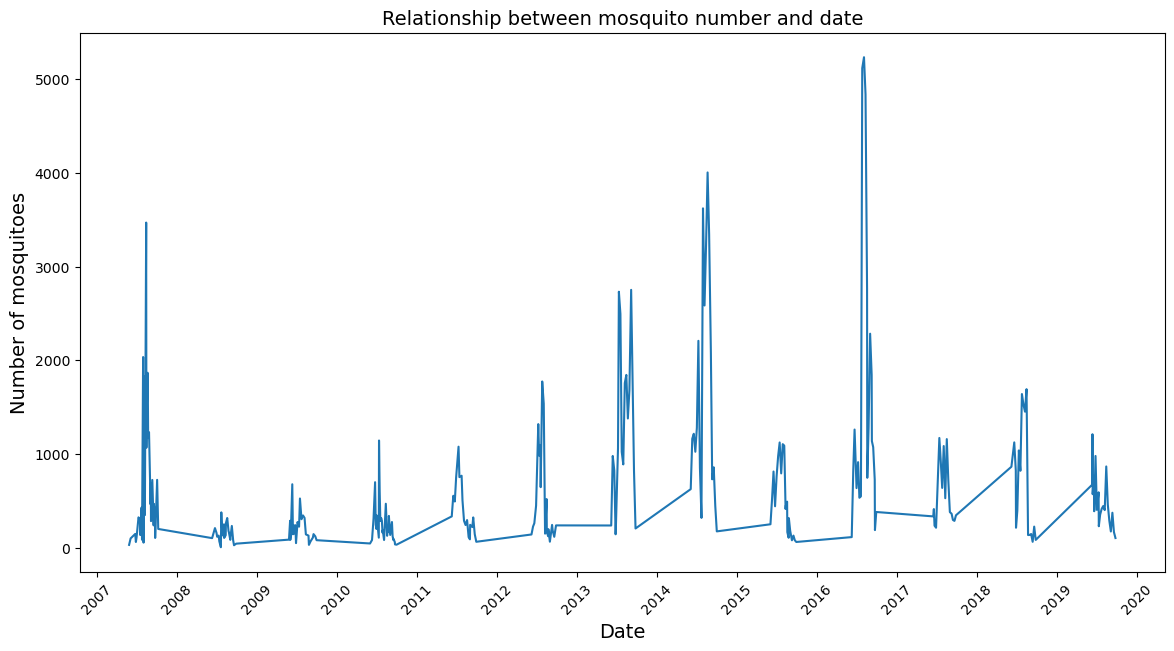

In [104]:
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(mos_number_per_date.index, mos_number_per_date)
# Major tick marks on the x-axis will be placed at yearly intervals
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of mosquitoes", fontsize=14)
plt.title("Relationship between mosquito number and date", fontsize=14)
plt.show()

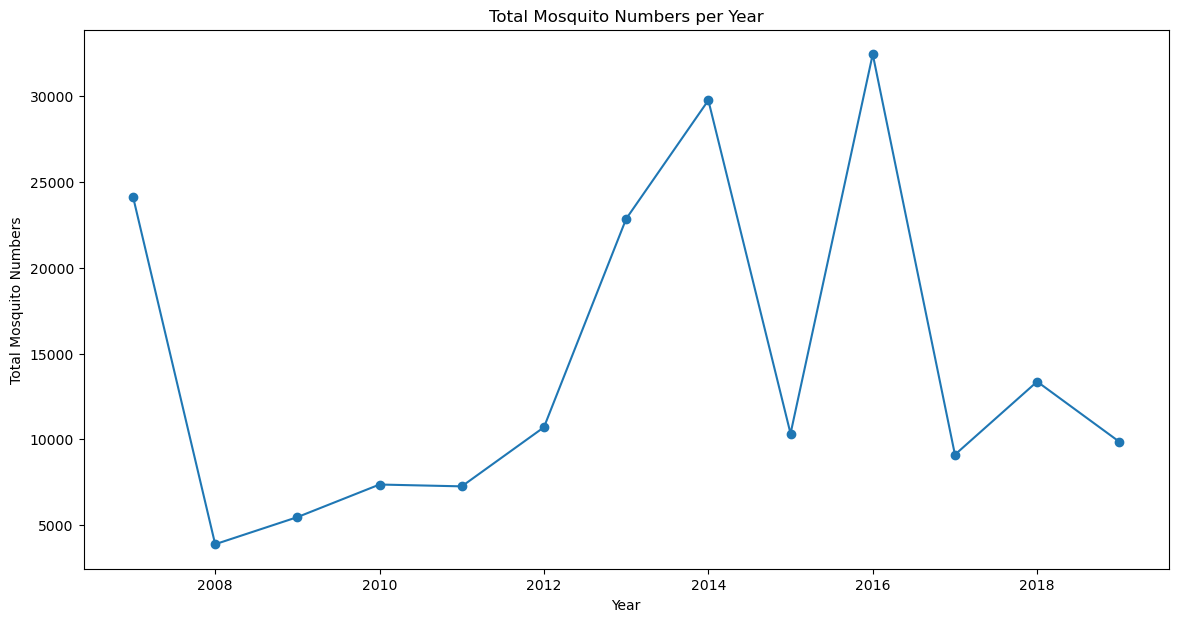

In [105]:
# Temporal Analysis: Mosquito numbers over Year 
plt.figure(figsize=(14, 7))
df.groupby('Year')['Mosquito number'].sum().plot(kind='line', marker='o')
plt.title('Total Mosquito Numbers per Year')
plt.xlabel('Year')
plt.ylabel('Total Mosquito Numbers')
plt.show()

From the figure above, it can be seen that after the year 2007 with a high number of mosquitoes, there has been a sudden drop in 2008. From 2008 to 2014, the number of mosquitoes shows a constant increase. While in the year 2015, there has been a decrease in the number of mosquitoes, and 2016 shows the highest record in the number of mosquitoes. From 2017 to 2019, the number of mosquitoes during the year has been steady. It can be seen that years 2007, 2014, and 2016 have the highest record of mosquitoes (2016 being the year with maximum number of mosquitoes). Also, seasonality can be seen in the data. It seems that some months, most probably in the summer, have the higher records of mosquito numbers. <br>Therefore, in the next part, the frequency of the number of mosquitoes per month of the year will be studied. 

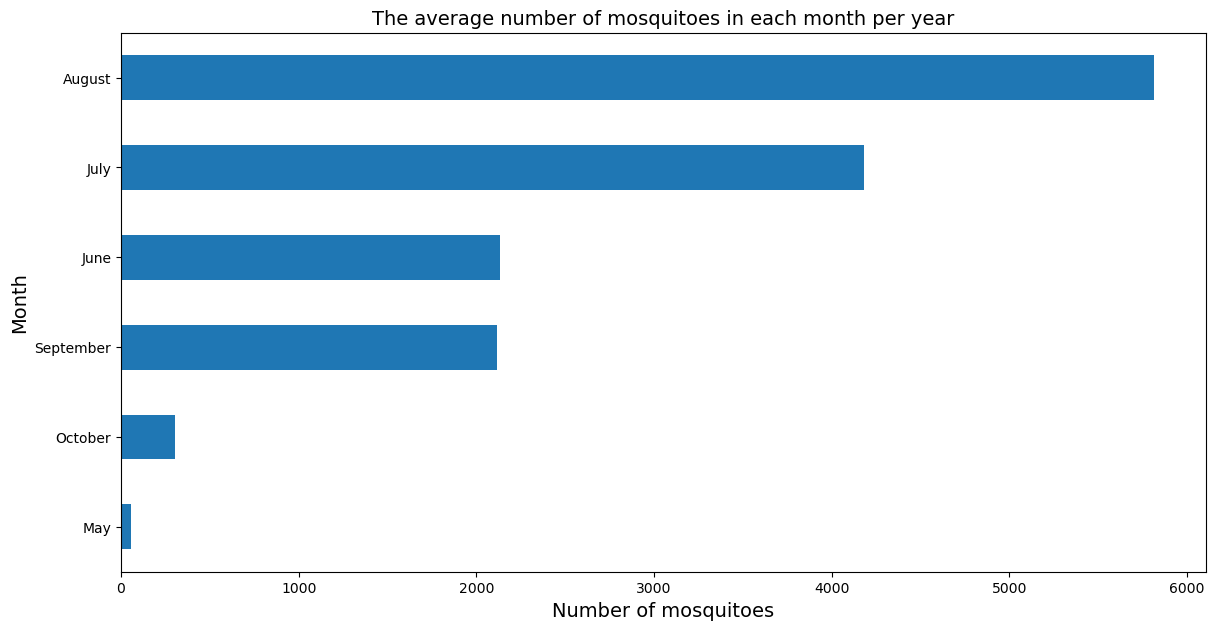

In [106]:
# Plotting the barplot for average number of mosquitoes in each month per year
plt.figure(figsize=(14, 7))
mos_number_per_month = df.groupby([df['Date'].dt.year, df['Date'].dt.month_name()])['Mosquito number'].sum()
mos_number_per_month.unstack().mean(axis=0).sort_values(ascending=True).plot(kind='barh')
plt.xlabel("Number of mosquitoes", fontsize=14)
plt.ylabel("Month", fontsize=14)
plt.title("The average number of mosquitoes in each month per year", fontsize=14)
plt.show()

### Heatmap plot for the number of mosquitoes varies across different years and months

In [107]:
# Creating "Month" column
df['Month'] = df['Date'].dt.month_name()

# Create a dictionary with month names and their order
month_order = {month: i for i, month in enumerate(['May', 'June', 'July', 'August', 'September', 'October'])}
# Convert the 'Month' column to a categorical variable with the desired order
df['Month'] = pd.Categorical(df['Month'], categories=month_order.keys(), ordered=True)

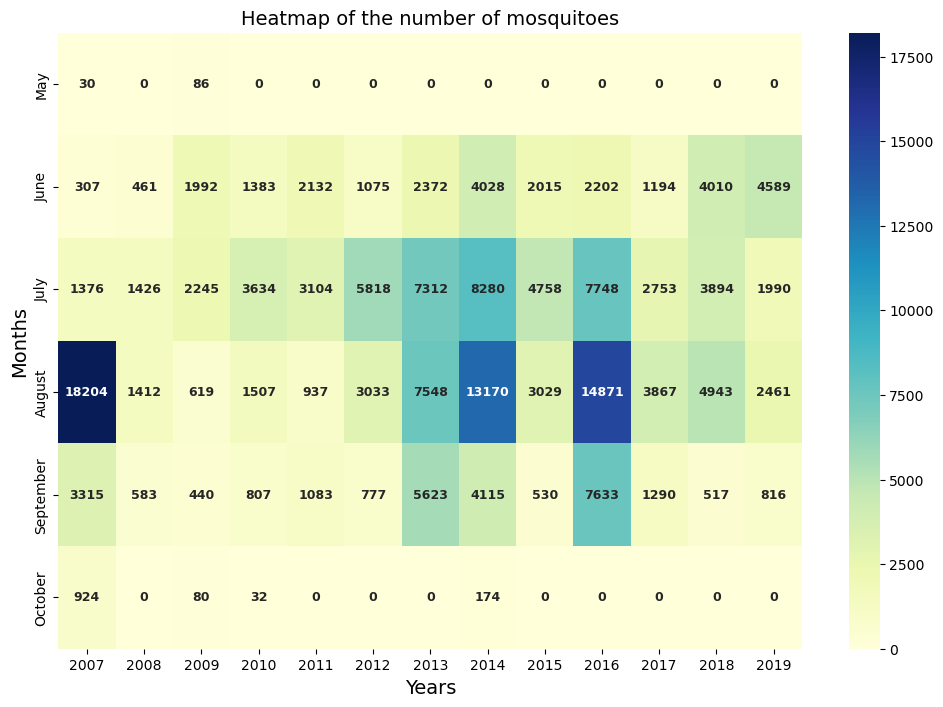

In [108]:
# Plot the heatmap data
heatmap_data = df.groupby(['Year', 'Month'])['Mosquito number'].sum().reset_index()
heatmap_data = heatmap_data.pivot(index='Month', columns='Year', values='Mosquito number')
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, annot=True, fmt='d', annot_kws={"fontsize":9, "fontweight":"bold"}, cmap='YlGnBu')
plt.xlabel("Years", fontsize=14)
plt.ylabel("Months", fontsize=14)
plt.title("Heatmap of the number of mosquitoes", fontsize=14)
plt.show()

As can be seen in this figure, August and July are the months with the highest record of mosquito numbers following by June and September. Therefore, it can be observed that there is a seasonality with highest peak in August and July.<br> Also, the months of July, August, September of the years 2013, 2014, 2016 along with August 2007 have the highest number of mosquitoes.  

### Spatial Analysis of the locations and the number of mosquitoes

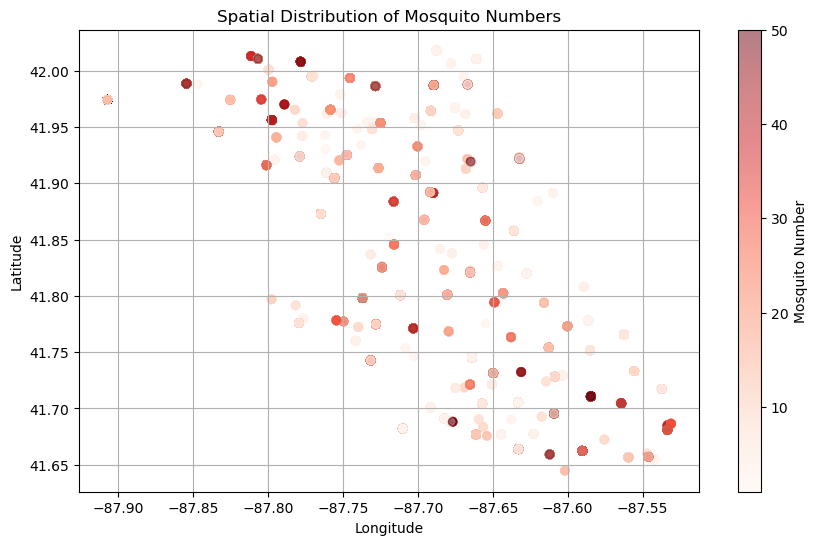

In [109]:
# Scatter plot of mosquito numbers based on latitude and longitude
plt.figure(figsize=(10, 6))
plt.scatter(df['Lon'], df['Lat'], c=df['Mosquito number'], cmap='Reds', alpha=0.5)
plt.colorbar(label='Mosquito Number')
plt.title('Spatial Distribution of Mosquito Numbers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

This shows that certain geographic areas have higher mosquito activity, indicated by darker red points.

### Relationship between mosquito species and WNV prevalence

The stacked barplot will be used to show the relationship between mosquito species and WNV prevalence.

In [110]:
# Percentage of the species with WNV positive
pct_species_positive = df.groupby(['Species', 'WNV Present'])['Species'].count() / df.groupby('Species')['Species'].count()

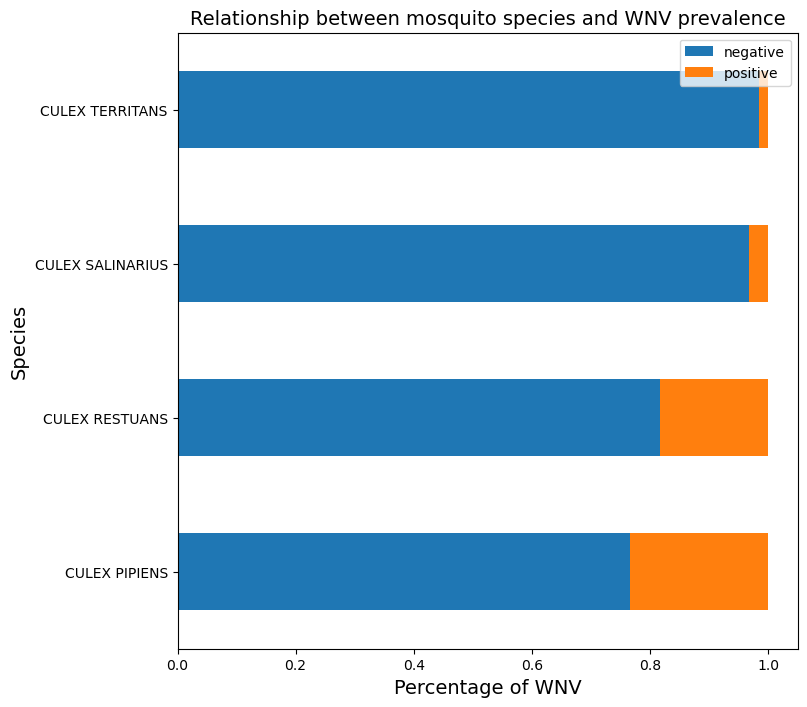

In [111]:
# Plot the stacked barplot
pct_species_positive.unstack().plot(kind='barh', stacked=True, figsize=(8,8))
plt.xlabel("Percentage of WNV", fontsize=14)
plt.ylabel("Species", fontsize=14)
plt.title("Relationship between mosquito species and WNV prevalence", fontsize=14)
plt.legend(loc='upper right')
plt.show()

From the figure above, it can be seen that 'CULEX PIPIENS' and 'CULEX RESTUANS' have the highest WNV presence ratio between the species.

### Relationship between the number of mosquitos caught and trap type

It was shown that GRAVID was the most frequent trap used in the city following by CDC and SENTINEL. Here, the  relationship between the number of mosquitos caught and trap type will be studied by boxplot.   

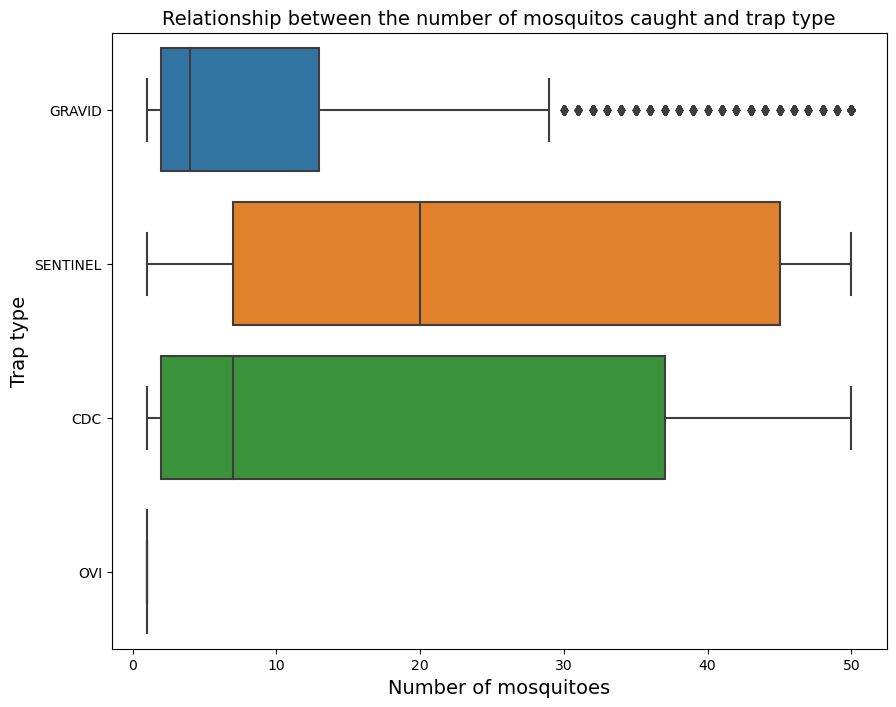

In [112]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x='Mosquito number', y='Trap type', data=df, ax=ax)
plt.xlabel("Number of mosquitoes", fontsize=14)
plt.ylabel("Trap type", fontsize=14)
plt.title("Relationship between the number of mosquitos caught and trap type", fontsize=14)
plt.show()

As illustrated, the median number of mosquitoes traped for "GRAVID" is lower than "SENTINEL" and "CDC". It seems that "SENTINEL" has the best performance in trapping the mosquitoes with an inter-quartile range between around 8 and 45 mosquitoes trapped.<br>
Now, let's see how many mosquitoes in total have been trapped for each od these trp types.

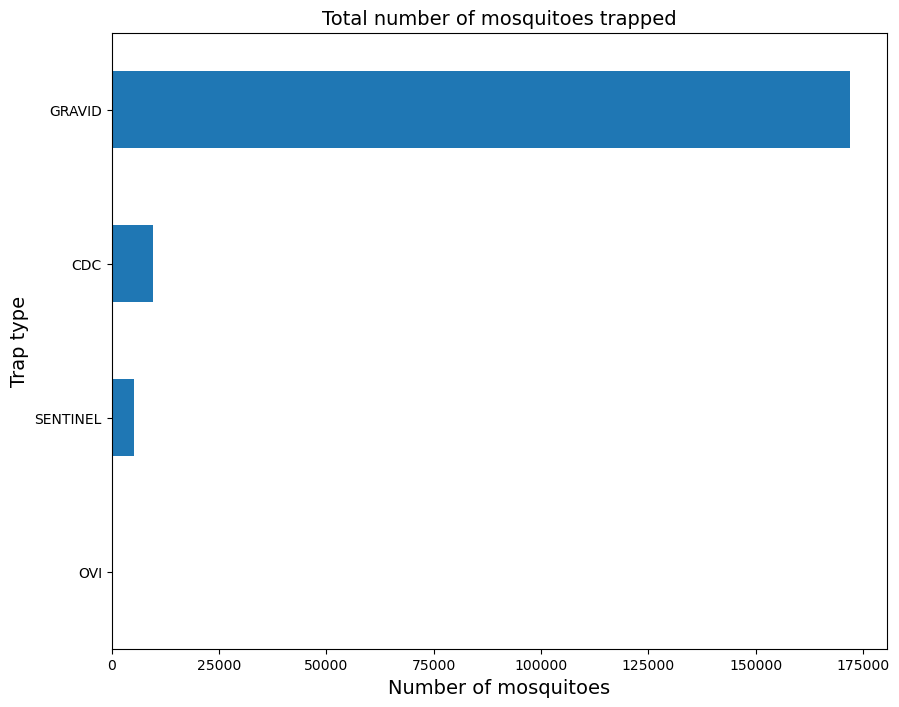

In [113]:
df.groupby('Trap type')['Mosquito number'].sum().sort_values().plot(kind='barh', figsize=(10,8))
plt.xlabel("Number of mosquitoes", fontsize=14)
plt.ylabel("Trap type", fontsize=14)
plt.title("Total number of mosquitoes trapped", fontsize=14)
plt.show()

As expected, since the "GRAVID" is the most prevalent trap type, it has the maximum number of mosquitoes trapped. However, comparing the two plots, it should be mentioned that "SENTINEL" is the most efficient trap among others. 